**Table of contents**<a id='toc0_'></a>    
- [Import statements](#toc1_1_)    
- [Loading the datasets](#toc1_2_)    
- [Introduction to Sampling](#toc2_)    
  - [Random sampling from particular distributions](#toc2_1_)    
  - [Random sampling from a DataFrame](#toc2_2_)    
  - [Bias in sampling](#toc2_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import statements](#toc0_)

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <a id='toc1_2_'></a>[Loading the datasets](#toc0_)

- Spotify dataset contains song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability.

In [3]:
spotify_population = pd.read_feather("./datasets/spotify_2000_2020.feather")

In [4]:
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [5]:
spotify_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41656 entries, 0 to 41655
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      41656 non-null  float64
 1   artists           41656 non-null  object 
 2   danceability      41656 non-null  float64
 3   duration_ms       41656 non-null  float64
 4   duration_minutes  41656 non-null  float64
 5   energy            41656 non-null  float64
 6   explicit          41656 non-null  float64
 7   id                41656 non-null  object 
 8   instrumentalness  41656 non-null  float64
 9   key               41656 non-null  float64
 10  liveness          41656 non-null  float64
 11  loudness          41656 non-null  float64
 12  mode              41656 non-null  float64
 13  name              41656 non-null  object 
 14  popularity        41656 non-null  float64
 15  release_date      41656 non-null  object 
 16  speechiness       41656 non-null  float6

## <a id='toc2_'></a>[Introduction to Sampling](#toc0_)

We will primarily be working with the "duration_minutes" column. Let's explore it some more.

In [6]:
spotify_population.duration_minutes.describe()

count    41656.000000
mean         3.852152
std          1.505201
min          0.505017
25%          3.197333
50%          3.704883
75%          4.290450
max         90.058333
Name: duration_minutes, dtype: float64

`Box plots` are a great way to visualize descriptive statistics for a sample and spotting outliers.

<Axes: xlabel='duration_minutes'>

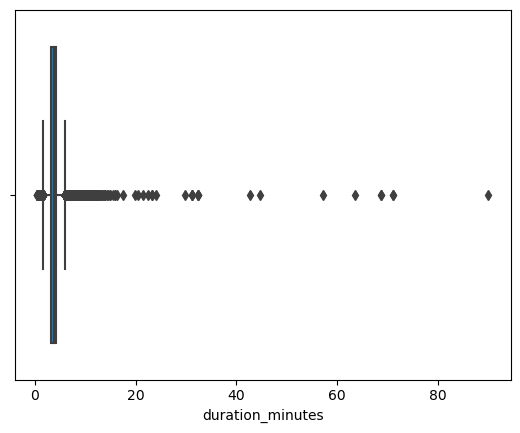

In [7]:
sns.boxplot(x=spotify_population.duration_minutes)

In [8]:
spotify_population.duration_minutes.quantile([0.95])

0.95    5.664833
Name: duration_minutes, dtype: float64

Let's just drop the rows with "duration > 10 minutes" for now.

In [9]:
spotify_population = spotify_population[spotify_population.duration_minutes < 10]

In [10]:
spotify_population.shape

(41549, 20)

### <a id='toc2_1_'></a>[Random sampling from particular distributions](#toc0_)

**Docs: https://numpy.org/doc/stable/reference/random/generator.html#distributions**

Some of the common probability distributions we use for sampling are: *uniform, normal, binomial, and poisson* etc.

In [11]:
from numpy.random import default_rng

In [12]:
rng = default_rng()

In [13]:
rng.normal(loc=5, scale=2, size=100)

array([2.52089746, 8.65526586, 4.91481554, 5.78207371, 4.67999785,
       5.95094804, 5.59863266, 6.72969727, 3.79279869, 6.99530341,
       6.00843684, 5.08461815, 3.63602102, 6.35149334, 4.84686645,
       6.74709016, 6.04751804, 4.25001547, 7.85853362, 3.40795167,
       5.19543899, 3.39281941, 1.83385809, 5.00095709, 5.71924737,
       7.64450393, 4.93615226, 4.79843345, 4.43687685, 1.753733  ,
       4.34490777, 5.20457216, 7.02896323, 6.24380036, 3.41372397,
       3.47549004, 3.98386322, 4.13713416, 5.50392655, 3.82393103,
       7.46772713, 4.11442071, 7.43551358, 1.7225723 , 6.28793617,
       6.34179525, 5.92712423, 1.6422077 , 4.79237599, 3.45688461,
       4.8817144 , 6.36823517, 4.57057132, 5.77280057, 5.6923616 ,
       3.85323773, 4.52156987, 5.58205332, 5.16259285, 4.46651863,
       3.98549197, 4.66292344, 3.0834301 , 4.11559667, 5.55586392,
       5.49927168, 8.91613694, 7.72899478, 6.3322015 , 4.28320132,
       3.20027961, 6.19760788, 4.09920635, 2.68541526, 7.69833

- These random distributions that we generate are actually pseudo-random. We can reproduce the results by setting a random seed. Use, `numpy.random.default_rng(seed)` to set a random seed.

- `Histograms` come in very handy to visualize these generated distributions and confirm that they are indeed representative of the distributions we expect them to be.

### <a id='toc2_2_'></a>[Random sampling from a DataFrame](#toc0_)

- Use the `df.sample(n)` method for simple random sampling without replacement

In [14]:
spotify_sample = spotify_population.sample(1000)

In [15]:
print(f"Population mean (Duration mins): {spotify_population.duration_minutes.mean()}")
print(f"Sample mean (Duration mins): {spotify_sample.duration_minutes.mean()}")

Population mean (Duration mins): 3.8152246796954605
Sample mean (Duration mins): 3.796057183333333


- Use `df.sample(n, replace=True)` for random sampling with replacement

### <a id='toc2_3_'></a>[Bias in sampling](#toc0_)

Non-probability sampling methods such as convenience sampling, judgement sampling, quota sampling, and snowball sampling are more likely to result in biased samples than probability sampling methods. 

- If you have data available for the entire population then `histograms` can be a very good way to verify that your sample is representative of the population.

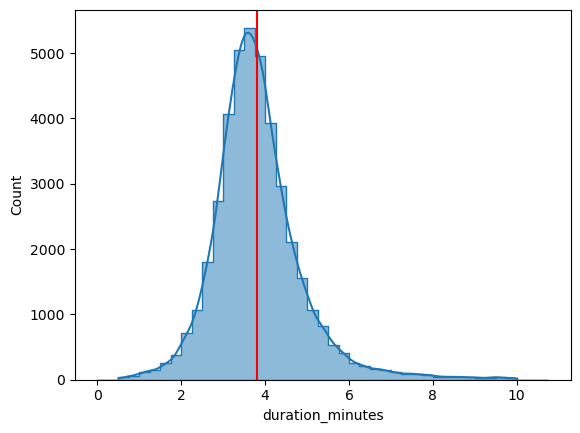

In [16]:
ax = sns.histplot(
    spotify_population.duration_minutes,
    element="step",
    bins=np.arange(0, 11, 0.25),
    kde=True,
)
# add a vertical line to draw attention to the mean
ax.axvline(x=spotify_population.duration_minutes.mean(), color="red")
plt.show()

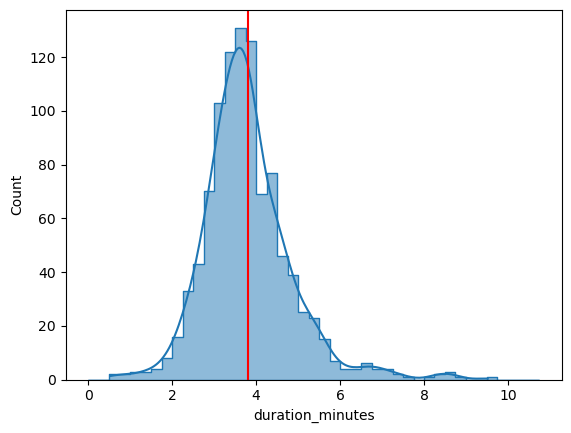

In [17]:
ax = sns.histplot(
    spotify_sample.duration_minutes,
    element="step",
    bins=np.arange(0, 11, 0.25),
    kde=True,
)
# add a vertical line to draw attention to the mean
ax.axvline(x=spotify_sample.duration_minutes.mean(), color="red")
plt.show()

From the above histograms we can see that our sample represents the population fairly well.